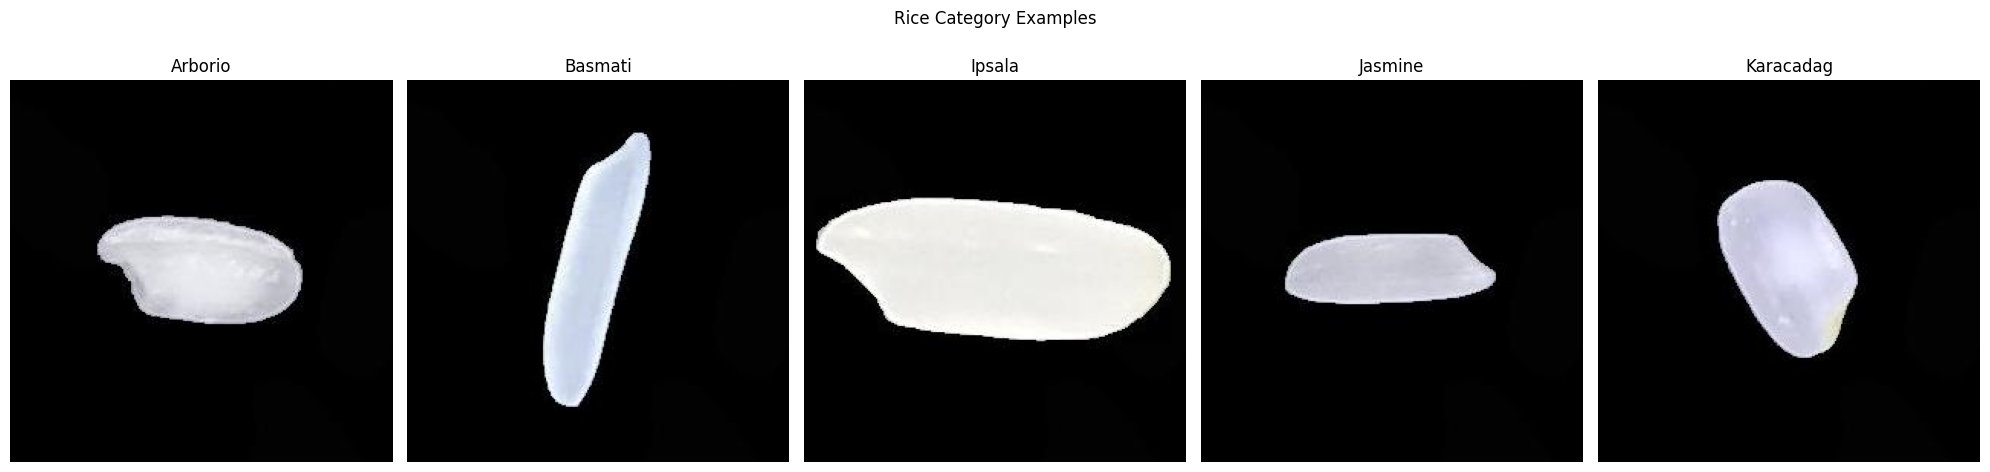

In [2]:
import pathlib
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import plotly.offline as iplot
import plotly.express as px
import pandas as pd
import tensorflow_hub as hub
import plotly
import matplotlib.pyplot as plt

data_dir = pathlib.Path('Rice_Image_Dataset')

try:
    arborio = list(data_dir.glob('Arborio/*'))[:600]
    basmati = list(data_dir.glob('Basmati/*'))[:600]
    ipsala = list(data_dir.glob('Ipsala/*'))[:600]
    jasmine = list(data_dir.glob('Jasmine/*'))[:600]
    karacadag = list(data_dir.glob('Karacadag/*'))[:600]
except Exception as e:
    print(f"Error listing image paths. Make sure 'Rice_Image_Dataset' exists and has subdirectories like 'Arborio', 'Basmati', etc. Error: {e}")
    exit()

fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle('Rice Category Examples')

try:
    arborio_image = cv2.imread(str(arborio[0]))
    basmati_image = cv2.imread(str(basmati[0]))
    ipsala_image = cv2.imread(str(ipsala[0]))
    jasmine_image = cv2.imread(str(jasmine[0]))
    karacadag_image = cv2.imread(str(karacadag[0]))
except IndexError:
    print("Error: Not enough images found in one or more categories. Ensure each category has at least one image.")
    exit()
except Exception as e:
    print(f"Error loading images. Please check the image paths and file integrity. Error: {e}")
    exit()

ax[0].set_title('Arborio')
ax[0].imshow(cv2.cvtColor(arborio_image, cv2.COLOR_BGR2RGB))
ax[0].axis('off')

ax[1].set_title('Basmati')
ax[1].imshow(cv2.cvtColor(basmati_image, cv2.COLOR_BGR2RGB))
ax[1].axis('off')

ax[2].set_title('Ipsala')
ax[2].imshow(cv2.cvtColor(ipsala_image, cv2.COLOR_BGR2RGB))
ax[2].axis('off')

ax[3].set_title('Jasmine')
ax[3].imshow(cv2.cvtColor(jasmine_image, cv2.COLOR_BGR2RGB))
ax[3].axis('off')

ax[4].set_title('Karacadag')
ax[4].imshow(cv2.cvtColor(karacadag_image, cv2.COLOR_BGR2RGB))
ax[4].axis('off')

df_images = {
    'arborio': arborio,
    'basmati': basmati,
    'ipsala': ipsala,
    'jasmine': jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4
}

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [3]:
x,y=[],[]
for label,images in df_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(df_labels[label])

In [4]:
x=np.array(x)
x=x/255
y=np.array(y)

In [5]:
x_train,x_test_val,y_train,y_test_val=train_test_split(x,y)
x_test,x_val,y_test,y_val=train_test_split(x_test_val,y_test_val)

In [6]:
mobile_net="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net= hub.KerasLayer(
    mobile_net,input_shape=(224,224,3),trainable=False
)

In [7]:
mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(
    mobile_net_url,
    input_shape=(224, 224, 3), # Input shape for MobileNetV2
    trainable=False # Freeze the pre-trained layers
)

# Define the number of output classes
num_label = 5

# Build the Keras Sequential model
model = tf.keras.Sequential([
    mobile_net,
    # Add a Dense layer for classification with softmax activation
    # Softmax ensures the output is a probability distribution over the classes
    tf.keras.layers.Dense(num_label, activation='softmax')
])

# Compile the model
# Use Adam optimizer for efficient training
# Use SparseCategoricalCrossentropy as loss function because labels are integers (not one-hot encoded)
# Monitor accuracy during training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
71/71 [==============================] - 24s 287ms/step - loss: 0.5110 - accuracy: 0.8671 - val_loss: 0.1798 - val_accuracy: 0.9787
Epoch 2/10
71/71 [==============================] - 38s 535ms/step - loss: 0.1426 - accuracy: 0.9698 - val_loss: 0.1135 - val_accuracy: 0.9840
Epoch 3/10
71/71 [==============================] - 31s 431ms/step - loss: 0.1000 - accuracy: 0.9800 - val_loss: 0.0860 - val_accuracy: 0.9840
Epoch 4/10
71/71 [==============================] - 30s 430ms/step - loss: 0.0798 - accuracy: 0.9836 - val_loss: 0.0703 - val_accuracy: 0.9840
Epoch 5/10
71/71 [==============================] - 32s 446ms/step - loss: 0.0656 - accuracy: 0.9862 - val_loss: 0.0637 - val_accuracy: 0.9840
Epoch 6/10
71/71 [==============================] - 31s 432ms/step - loss: 0.0564 - accuracy: 0.9898 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 7/10
71/71 [==============================] - 39s 546ms/step - loss: 0.0526 - accuracy: 0.9893 - val_loss: 0.0548 - val_accuracy: 0.9894

In [9]:
#model.save("rice.h5")

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

18/18 [==============================] - 9s 487ms/step - loss: 0.0496 - accuracy: 0.9858
Test Loss: 0.0496
Test Accuracy: 0.9858


In [11]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
# Calculate and print the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Define target names for better readability in the classification report
target_names = list(df_images.keys()) # ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']
# Calculate and print the Classification Report
print("\n--- Classification Report ---")
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

18/18 [==============================] - 9s 461ms/step

--- Confusion Matrix ---
[[111   0   0   3   2]
 [  0 122   0   2   0]
 [  0   0 109   0   0]
 [  0   0   0  98   0]
 [  1   0   0   0 114]]

--- Classification Report ---
              precision    recall  f1-score   support

     arborio       0.99      0.96      0.97       116
     basmati       1.00      0.98      0.99       124
      ipsala       1.00      1.00      1.00       109
     jasmine       0.95      1.00      0.98        98
   karacadag       0.98      0.99      0.99       115

    accuracy                           0.99       562
   macro avg       0.99      0.99      0.99       562
weighted avg       0.99      0.99      0.99       562



In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are defined
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)



--- Confusion Matrix ---
[[111   0   0   3   2]
 [  0 122   0   2   0]
 [  0   0 109   0   0]
 [  0   0   0  98   0]
 [  1   0   0   0 114]]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assume X and y are your data and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train your model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predict
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # if you're using softmax output

# Confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)


Epoch 1/10
75/75 [==============================] - 36s 479ms/step - loss: 0.0365 - accuracy: 0.9937 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 2/10
75/75 [==============================] - 36s 480ms/step - loss: 0.0324 - accuracy: 0.9933 - val_loss: 0.0396 - val_accuracy: 0.9900
Epoch 3/10
75/75 [==============================] - 53s 702ms/step - loss: 0.0313 - accuracy: 0.9937 - val_loss: 0.0350 - val_accuracy: 0.9917
Epoch 4/10
75/75 [==============================] - 48s 648ms/step - loss: 0.0281 - accuracy: 0.9942 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 5/10
75/75 [==============================] - 49s 654ms/step - loss: 0.0246 - accuracy: 0.9946 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 6/10
75/75 [==============================] - 53s 703ms/step - loss: 0.0226 - accuracy: 0.9950 - val_loss: 0.0339 - val_accuracy: 0.9900
Epoch 7/10
75/75 [==============================] - 52s 691ms/step - loss: 0.0209 - accuracy: 0.9954 - val_loss: 0.0341 - val_accuracy: 0.9883